## Basic image classification through ANN (not CNN)
## Data-set Fashion MNIST
## Keras and Tensorflow

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.1


## Import the Fashion MNIST dataset

**Fashion MNIST dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels):**

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is a replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often described as the "Hello, World" of machine learning programs for computer vision. 

The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing that are used here.

Fashion MNIST is slightly more challenging than regular MNIST. 

However both datasets are relatively small and are considered to be a good starting point to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. 

Fashion MNIST can be accessed directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

* Explore the format of the dataset before training the model. 
* There are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [4]:
train_images.shape

(60000, 28, 28)

#### determine the number of labels in the training set:

In [5]:
len(train_labels)

60000

#### Know the number of labels

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

#### Number of images in the test set (each image is represented as 28 x 28 pixels)

In [7]:
test_images.shape

(10000, 28, 28)

#### Number of labes in test set

In [8]:
len(test_labels)

10000

## Preprocessing the data

The data must be preprocessed before training the network. 
The pixel values fall in the range of 0 to 255:

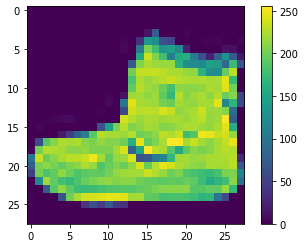

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

* Scale these values to a range of 0 to 1 before feeding them to the neural network model. 
* To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

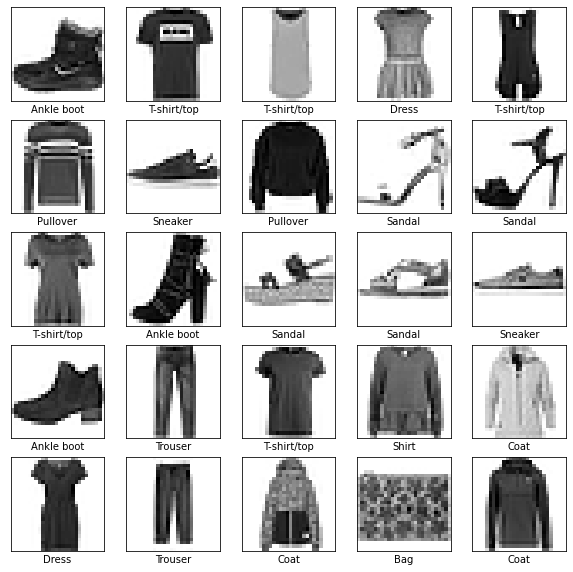

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers
* The basic building block of a neural network is the *layer*. 
* Layers extract representations from the data fed into them. 
* Most of deep learning consists of chaining together simple layers. 
* Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # First layer will be a flatten layer when we are using image dataset #
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### First layer - Flatten layer
The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). 
Think of this layer as unstacking rows of pixels in the image and lining them up. 
This layer has no parameters to learn; it only reformats the data.


After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers.

    These are densely connected, or fully connected, neural layers.
    The first Dense layer has 128 nodes (or neurons).
    The second (and last) layer returns a logits array with length of 10. 
    Each node contains a score that indicates the current image belongs to one of the 10 classes.

Compile the model

model.compile (optimizer, loss, metrics)

* `Loss function` —To measures how accurate the model is during training.
* `Optimizer` — How the model is updated based on the data it sees and its loss function.
* `Metrics`— To monitor the training and testing steps. This example uses accuracy, the fraction of the images that are correctly classified.

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. Verify that the predictions match the labels from the `test_labels` array.

### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [14]:
model.fit(train_images, train_labels, epochs=500)

Epoch 1/500
1875/1875 [==============================] - 12s 5ms/step - loss: 0.4993 - accuracy: 0.8241
Epoch 2/500
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3790 - accuracy: 0.8633
Epoch 3/500
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3395 - accuracy: 0.8766
Epoch 4/500
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3141 - accuracy: 0.8850
Epoch 5/500
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2960 - accuracy: 0.8906
Epoch 6/500
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2828 - accuracy: 0.8959
Epoch 7/500
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2685 - accuracy: 0.8998
Epoch 8/500
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2585 - accuracy: 0.9035
Epoch 9/500
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2501 - accuracy: 0.9063
Epoch 10/500
1875/1875 [==============================] - 6s 3ms/ste

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0659 - accuracy: 0.9752
Epoch 80/500
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0625 - accuracy: 0.9765
Epoch 81/500
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0625 - accuracy: 0.9771
Epoch 82/500
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0633 - accuracy: 0.9758
Epoch 83/500
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0621 - accuracy: 0.9769
Epoch 84/500
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0612 - accuracy: 0.9772
Epoch 85/500
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0605 - accuracy: 0.9764
Epoch 86/500
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0595 - accuracy: 0.9773
Epoch 87/500
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0580 - accuracy: 0.9781
Epoch 88/500
1875/1875 [==============================] - 9s 5ms/step - loss:

1875/1875 [==============================] - 9s 5ms/step - loss: 0.0311 - accuracy: 0.9890
Epoch 158/500
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0329 - accuracy: 0.9879
Epoch 159/500
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0322 - accuracy: 0.9877
Epoch 160/500
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0290 - accuracy: 0.9895
Epoch 161/500
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0314 - accuracy: 0.9886
Epoch 162/500
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0301 - accuracy: 0.9895
Epoch 163/500
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0317 - accuracy: 0.9887
Epoch 164/500
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0328 - accuracy: 0.9883
Epoch 165/500
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0310 - accuracy: 0.9893
Epoch 166/500
1875/1875 [==============================] - 7s 4ms/ste

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0211 - accuracy: 0.9926
Epoch 236/500
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0229 - accuracy: 0.9921
Epoch 237/500
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0252 - accuracy: 0.9913
Epoch 238/500
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0189 - accuracy: 0.9933
Epoch 239/500
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0227 - accuracy: 0.9922
Epoch 240/500
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0242 - accuracy: 0.9916
Epoch 241/500
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0225 - accuracy: 0.9922
Epoch 242/500
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0181 - accuracy: 0.9936
Epoch 243/500
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0222 - accuracy: 0.9923
Epoch 244/500
1875/1875 [==============================] - 8s 4ms/ste

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0176 - accuracy: 0.9940
Epoch 314/500
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0177 - accuracy: 0.9943
Epoch 315/500
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0184 - accuracy: 0.9942
Epoch 316/500
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0187 - accuracy: 0.9937
Epoch 317/500
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0159 - accuracy: 0.9948
Epoch 318/500
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0141 - accuracy: 0.9953
Epoch 319/500
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0184 - accuracy: 0.9939
Epoch 320/500
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0204 - accuracy: 0.9931
Epoch 321/500
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0135 - accuracy: 0.9957
Epoch 322/500
1875/1875 [==============================] - 7s 4ms/ste

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0188 - accuracy: 0.9947
Epoch 392/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0144 - accuracy: 0.9958
Epoch 393/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0125 - accuracy: 0.9959
Epoch 394/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0166 - accuracy: 0.9947
Epoch 395/500
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0157 - accuracy: 0.9952
Epoch 396/500
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0109 - accuracy: 0.9968
Epoch 397/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0171 - accuracy: 0.9949
Epoch 398/500
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0144 - accuracy: 0.9952
Epoch 399/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0145 - accuracy: 0.9959
Epoch 400/500
1875/1875 [==============================] - 4s 2ms/ste

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0131 - accuracy: 0.9965
Epoch 470/500
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0112 - accuracy: 0.9968
Epoch 471/500
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0138 - accuracy: 0.9959
Epoch 472/500
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0123 - accuracy: 0.9964
Epoch 473/500
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0106 - accuracy: 0.9968
Epoch 474/500
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0116 - accuracy: 0.9963
Epoch 475/500
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0141 - accuracy: 0.9958
Epoch 476/500
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0112 - accuracy: 0.9965
Epoch 477/500
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0149 - accuracy: 0.9956
Epoch 478/500
1875/1875 [==============================] - 6s 3ms/st

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3273 - accuracy: 0.8849 - 455ms/epoch - 1ms/step

Test accuracy: 0.8848999738693237


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset.
This gap between training accuracy and test accuracy represents *overfitting*. 
Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. 
An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. 

### Make predictions

Use the model to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [18]:
predictions[0]

array([1.35971084e-06, 1.85229942e-09, 1.16796608e-08, 4.02856859e-09,
       1.98280525e-09, 5.43304777e-04, 3.30415702e-07, 3.91181884e-03,
       1.37499345e-08, 9.95543182e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [19]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [20]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [21]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

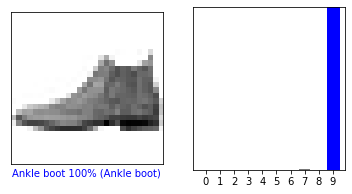

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

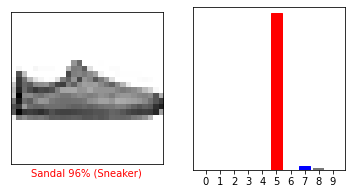

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Plot a few images with their predictions. 

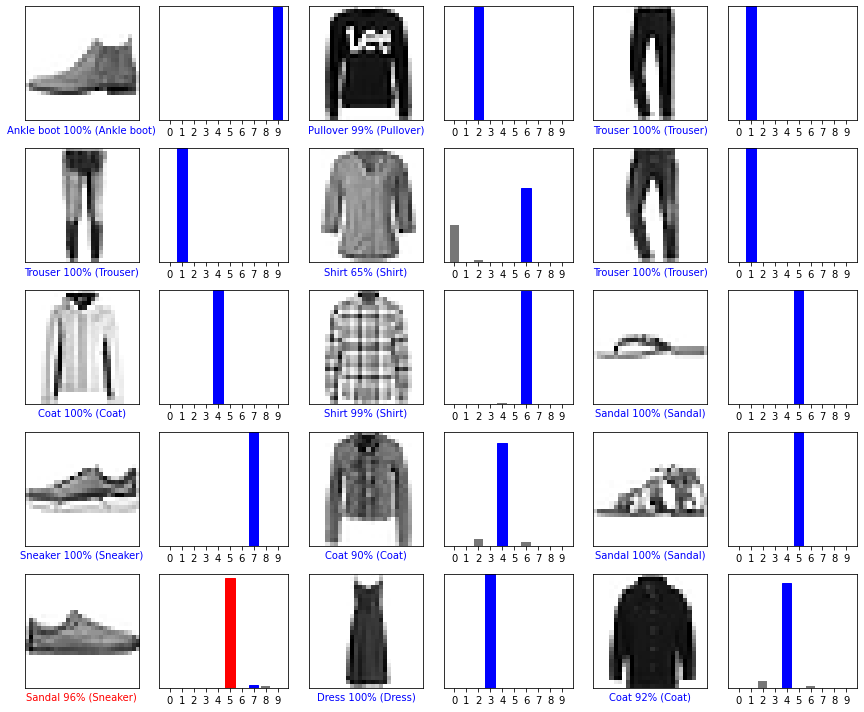

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [25]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [27]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.06611296e-04 2.17131369e-12 9.94413078e-01 1.16347765e-09
  5.02503803e-03 1.40935652e-15 4.55343630e-04 3.97267816e-17
  1.21796182e-08 5.49196918e-14]]


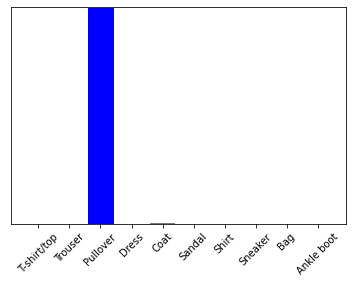

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [29]:
np.argmax(predictions_single[0])

2

The model predicts a label as expected.